<a href="https://colab.research.google.com/github/Xtian76/-MS-Progression-Prediction/blob/main/debugg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

# Assuming 'path' variable from the previous step holds the dataset path
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))

1/
    training/
        license.txt.bak
        2017-NI-Carass-Longitudinal-multiple-sclerosis-lesion-segmentation-Resource-and-challenge.pdf
        license.txt
        training05/
            masks/
                training05_03_mask2.nii
                training05_02_mask2.nii
                training05_04_mask1.nii
                training05_02_mask1.nii
                training05_04_mask2.nii
                training05_01_mask2.nii
                training05_01_mask1.nii
                training05_03_mask1.nii
            preprocessed/
                training05_02_flair_pp.nii
                training05_01_flair_pp.nii
                training05_04_flair_pp.nii
                training05_04_t2_pp.nii
                training05_04_pd_pp.nii
                training05_04_mprage_pp.nii
                training05_02_t2_pp.nii
                training05_03_mprage_pp.nii
                training05_03_flair_pp.nii
                training05_01_t2_pp.nii
                training05_03_t2

In [5]:
import os

# Dictionary to store paired files
paired_files = {}

# Assuming 'path' variable from the previous step holds the dataset path
for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.nii'):
            # Extract subject and scan identifier from filename
            parts = f.split('_')
            if len(parts) >= 3:
                subject_scan = '_'.join(parts[:2]) # e.g., trainingXX_YY

                if subject_scan not in paired_files:
                    paired_files[subject_scan] = {'flair': None, 'masks': []}

                if 'flair' in f:
                    if 'preprocessed' in root:
                        paired_files[subject_scan]['flair_pp'] = os.path.join(root, f)
                    else:
                        paired_files[subject_scan]['flair_orig'] = os.path.join(root, f)
                elif 'mask' in f:
                    paired_files[subject_scan]['masks'].append(os.path.join(root, f))

# Now you can access the paired files, for example:
# for subject_scan, files in paired_files.items():
#     print(f"Subject and Scan: {subject_scan}")
#     print(f"  Original FLAIR: {files.get('flair_orig')}")
#     print(f"  Preprocessed FLAIR: {files.get('flair_pp')}")
#     print(f"  Masks: {files.get('masks')}")

# You can now use the 'paired_files' dictionary for further processing.
print("Paired files dictionary created. You can inspect it by uncommenting the print statements.")

Paired files dictionary created. You can inspect it by uncommenting the print statements.


# ISBI MS Dataset Analysis Notebook

This notebook demonstrates how to download, inspect, and organize the ISBI Multiple Sclerosis Lesion Segmentation dataset.

## 1. Download the dataset

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marwa96/isbi-ms-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'isbi-ms-dataset' dataset.
Path to dataset files: /kaggle/input/isbi-ms-dataset


## 2. Inspect file structure

Let's examine the directory structure of the downloaded dataset to understand how the files are organized.

In [11]:
import os

# Assuming 'path' variable from the previous step holds the dataset path
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))

isbi-ms-dataset/
    training/
        2017-NI-Carass-Longitudinal-multiple-sclerosis-lesion-segmentation-Resource-and-challenge.pdf
        license.txt.bak
        license.txt
        training05/
            preprocessed/
                training05_02_mprage_pp.nii
                training05_03_pd_pp.nii
                training05_04_t2_pp.nii
                training05_01_t2_pp.nii
                training05_04_flair_pp.nii
                training05_03_mprage_pp.nii
                training05_03_t2_pp.nii
                training05_03_flair_pp.nii
                training05_01_pd_pp.nii
                training05_04_pd_pp.nii
                training05_02_t2_pp.nii
                training05_02_flair_pp.nii
                training05_01_mprage_pp.nii
                training05_04_mprage_pp.nii
                training05_01_flair_pp.nii
                training05_02_pd_pp.nii
            orig/
                training05_01_mprage.nii
                training05_04_t2.nii
             

## 3. Pair FLAIR images with masks

Based on the file naming convention, we can pair the FLAIR images with their corresponding masks using the subject and scan identifiers (e.g., `trainingXX_YY`).

In [12]:
import os

# Dictionary to store paired files
paired_files = {}

# Assuming 'path' variable from the previous step holds the dataset path
for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.nii'):
            # Extract subject and scan identifier from filename
            parts = f.split('_')
            if len(parts) >= 3:
                subject_scan = '_'.join(parts[:2]) # e.g., trainingXX_YY

                if subject_scan not in paired_files:
                    paired_files[subject_scan] = {'flair_orig': None, 'flair_pp': None, 'masks': []}

                if 'flair' in f:
                    if 'preprocessed' in root:
                        paired_files[subject_scan]['flair_pp'] = os.path.join(root, f)
                    else:
                        paired_files[subject_scan]['flair_orig'] = os.path.join(root, f)
                elif 'mask' in f:
                    paired_files[subject_scan]['masks'].append(os.path.join(root, f))

# You can now access the paired files, for example:
# for subject_scan, files in paired_files.items():
#     print(f"Subject and Scan: {subject_scan}")
#     print(f"  Original FLAIR: {files.get('flair_orig')}")
#     print(f"  Preprocessed FLAIR: {files.get('flair_pp')}")
#     print(f"  Masks: {files.get('masks')}")

print(f"Created paired_files dictionary with {len(paired_files)} entries.")

Created paired_files dictionary with 21 entries.


## 4. Further Analysis (Optional)

Now that you have the files paired, you can proceed with further analysis steps such as:

- **Loading image data**: Use libraries like `nibabel` to load the `.nii` image and mask files into arrays.
- **Visualization**: Visualize the images and masks to inspect the data.
- **Preprocessing**: Apply any necessary preprocessing steps to the image data.
- **Model Training**: Use the paired images and masks to train a segmentation model.

Here's an example of how you might load an image and its masks using `nibabel`:

In [13]:
# Example of loading an image and its masks using nibabel
# import nibabel as nib

# # Choose a subject and scan identifier from your paired_files dictionary
# example_subject_scan = list(paired_files.keys())[0]
# example_files = paired_files[example_subject_scan]

# # Load the preprocessed FLAIR image
# if example_files.get('flair_pp'):
#     flair_img = nib.load(example_files['flair_pp'])
#     flair_data = flair_img.get_fdata()
#     print(f"Loaded FLAIR image with shape: {flair_data.shape}")

# # Load the masks
# mask_data = []
# for mask_file in example_files.get('masks', []):
#     mask_img = nib.load(mask_file)
#     mask_data.append(mask_img.get_fdata())
#     print(f"Loaded mask with shape: {mask_img.get_fdata().shape}")

# # Now you can work with flair_data and mask_data for analysis or modeling

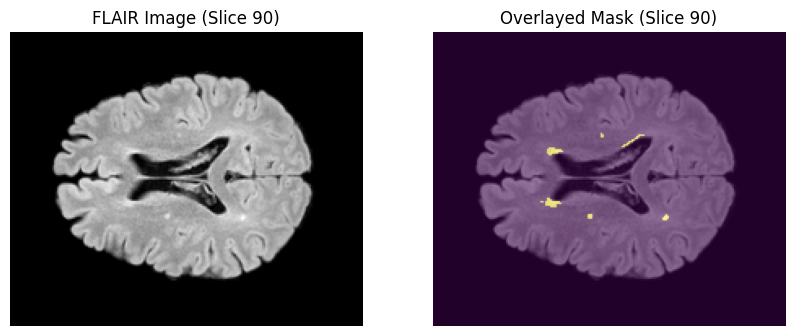

In [15]:
# Install nibabel if you haven't already
!pip install nibabel matplotlib

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Choose a subject and scan identifier from your paired_files dictionary
# Make sure the paired_files dictionary is available from previous steps
if 'paired_files' in locals() and len(paired_files) > 0:
    example_subject_scan = list(paired_files.keys())[0]
    example_files = paired_files[example_subject_scan]

    flair_img_path = example_files.get('flair_pp') or example_files.get('flair_orig')
    mask_files_paths = example_files.get('masks', [])

    if flair_img_path:
        # Load the FLAIR image
        flair_img = nib.load(flair_img_path)
        flair_data = flair_img.get_fdata()

        # Load the masks and combine them into one mask for visualization
        combined_mask_data = None
        for mask_file in mask_files_paths:
            mask_img = nib.load(mask_file)
            mask_data = mask_img.get_fdata()
            if combined_mask_data is None:
                combined_mask_data = mask_data
            else:
                combined_mask_data = np.maximum(combined_mask_data, mask_data) # Combine masks

        # Visualize a slice
        slice_idx = flair_data.shape[2] // 2 # Choose a middle slice

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(flair_data[:, :, slice_idx], cmap='gray')
        plt.title(f'FLAIR Image (Slice {slice_idx})')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(flair_data[:, :, slice_idx], cmap='gray') # Display FLAIR as background
        if combined_mask_data is not None:
            # Overlay the mask with some transparency
            plt.imshow(combined_mask_data[:, :, slice_idx], cmap='viridis', alpha=0.5)
            plt.title(f'Overlayed Mask (Slice {slice_idx})')
        else:
             plt.title(f'No Masks Found (Slice {slice_idx})')
        plt.axis('off')

        plt.show()

    else:
        print("No FLAIR image found for the example subject and scan.")
else:
    print("paired_files dictionary not found or is empty. Please run the previous steps to create it.")

In [16]:
# =============================================================================
# CELDA 1: Instalación de librerías (ejecutar solo una vez)
# =============================================================================
print("📦 Instalando librerías necesarias...")
print("Esto puede tardar 2-3 minutos...\n")

!pip install -q nibabel nilearn SimpleITK
!pip install -q pandas numpy scikit-learn
!pip install -q xgboost shap matplotlib seaborn
!pip install -q scikit-image
!pip install -q openpyxl

print("✅ Instalación completada!")

# =============================================================================
# CELDA 2: Importar librerías
# =============================================================================
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
from skimage import measure
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")
print(f"📍 Versiones:")
print(f"   - NumPy: {np.__version__}")
print(f"   - Pandas: {pd.__version__}")
print(f"   - Nibabel: {nib.__version__}")

📦 Instalando librerías necesarias...
Esto puede tardar 2-3 minutos...

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.3 MB/s eta 0:00:00
✅ Instalación completada!
✅ Librerías importadas correctamente
📍 Versiones:
   - NumPy: 2.0.2
   - Pandas: 2.2.2
   - Nibabel: 5.3.2


Remember to install `nibabel` if you haven't already:
`!pip install nibabel`

In [21]:
import pandas as pd
import nibabel as nib
import numpy as np
import os

# Make sure the feature extraction functions are defined and paired_files dictionary is available
if 'extract_intensity_features' in globals() and 'extract_mask_features' in globals() and 'paired_files' in locals():

    all_features = []

    print(f"Extracting features for {len(paired_files)} subjects/scans...")

    for subject_scan, files in paired_files.items():
        flair_img_path = files.get('flair_pp') or files.get('flair_orig')
        mask_files_paths = files.get('masks', [])

        if flair_img_path:
            try:
                # Load FLAIR image
                flair_img = nib.load(flair_img_path)
                flair_data = flair_img.get_fdata()
                voxel_spacing = flair_img.header.get_zooms()[:3] # Get voxel spacing

                # Combine masks if multiple exist
                combined_mask_data = None
                if mask_files_paths:
                    for mask_file in mask_files_paths:
                        mask_img = nib.load(mask_file)
                        mask_data = mask_img.get_fdata()
                        if combined_mask_data is None:
                            combined_mask_data = mask_data
                        else:
                            combined_mask_data = np.maximum(combined_mask_data, mask_data) # Combine masks

                # Extract features
                intensity_features = extract_intensity_features(flair_data, combined_mask_data)
                mask_features = extract_mask_features(combined_mask_data, voxel_spacing) if combined_mask_data is not None else {}

                # Combine all features for this subject/scan
                subject_features = {'subject_scan': subject_scan}
                subject_features.update(intensity_features)
                subject_features.update(mask_features)

                all_features.append(subject_features)
                print(f"Extracted features for {subject_scan}")

            except Exception as e:
                print(f"Error processing {subject_scan}: {e}")
                # Optionally, append an entry with an error flag or skip

    # Convert the list of dictionaries to a pandas DataFrame
    df_features = pd.DataFrame(all_features)

    print("\nFeature extraction complete.")
    print("DataFrame with extracted features created:")
    display(df_features.head())

else:
    print("Feature extraction functions or paired_files dictionary not found. Please run the previous steps.")

Extracting features for 21 subjects/scans...
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training05_02
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training05_03
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training05_04
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training05_01
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training04_03
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training04_02
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training04_04
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracte

,subject_scan,mean_intensity,median_intensity,std_intensity,min_intensity,max_intensity,variance_intensity,skewness_intensity,kurtosis_intensity,volume_voxels,volume_ml,surface_area_approx
0,training05_02,26121.413550,25970.917969,2286.140604,12966.480469,33917.613281,5.226439e+06,-0.449844,2.888297,6031,6.031,None
1,training05_03,688.151628,689.446838,69.232025,357.049652,920.454468,4.793073e+03,-0.533067,1.569744,5535,5.535,None
2,training05_04,759.117518,757.074402,66.487870,375.551880,961.033936,4.420637e+03,-0.389996,1.829467,5455,5.455,None
3,training05_01,47612.571214,47344.554688,4801.652008,29175.527344,66174.171875,2.305586e+07,-0.006845,1.559989,5895,5.895,None
4,training04_03,697.740505,695.647003,98.550505,98.588974,1056.841187,9.712202e+03,-0.946744,3.399445,3856,3.856,None


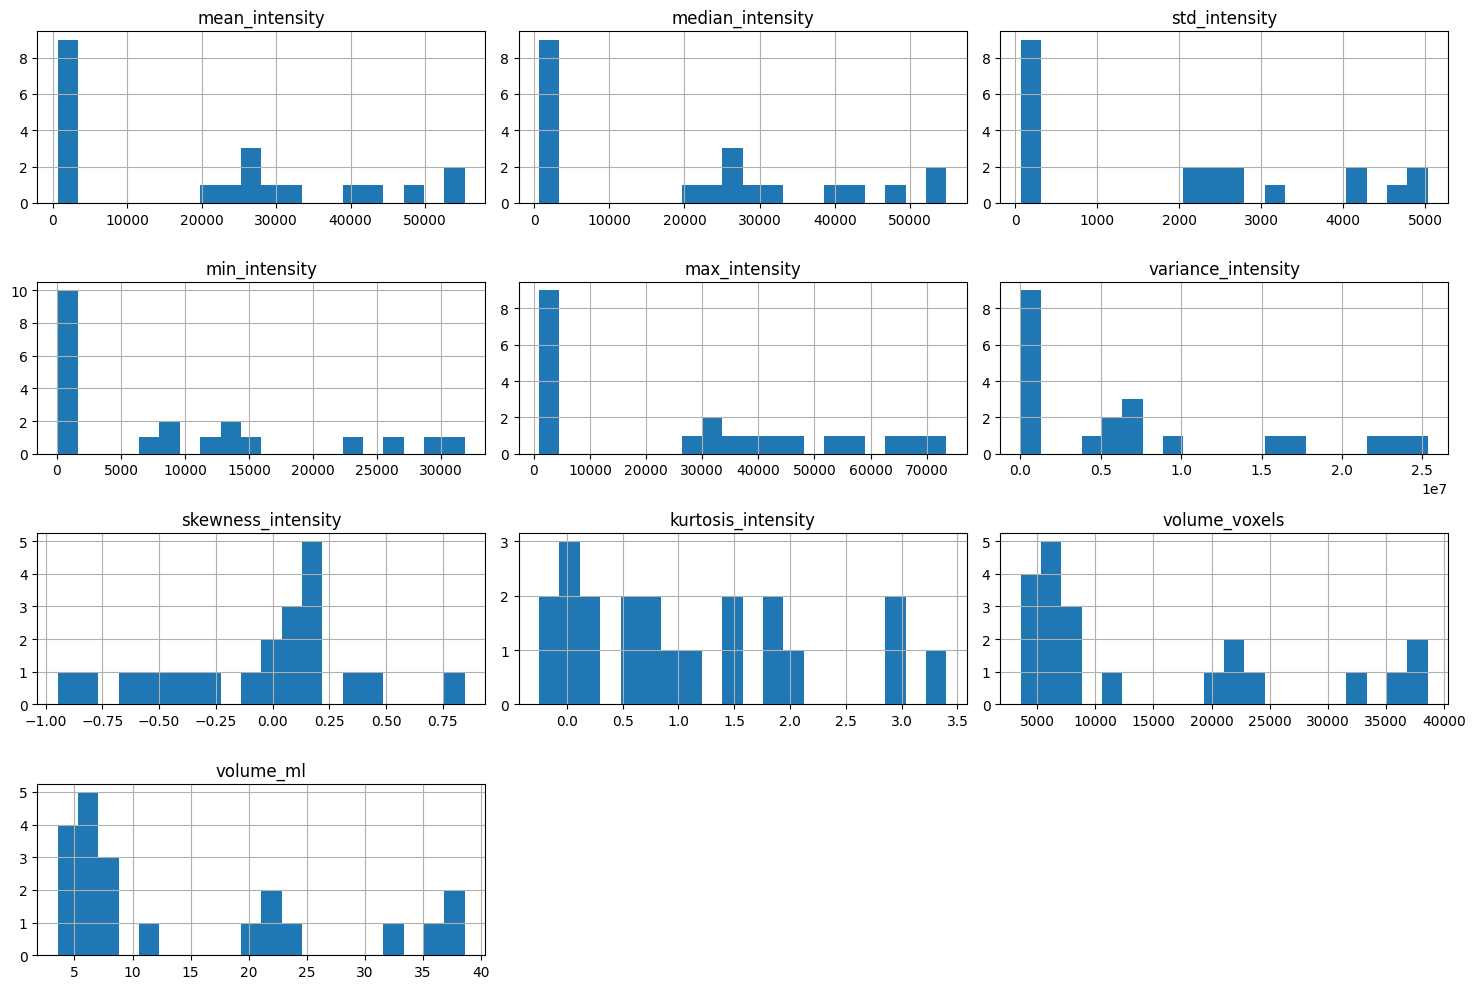

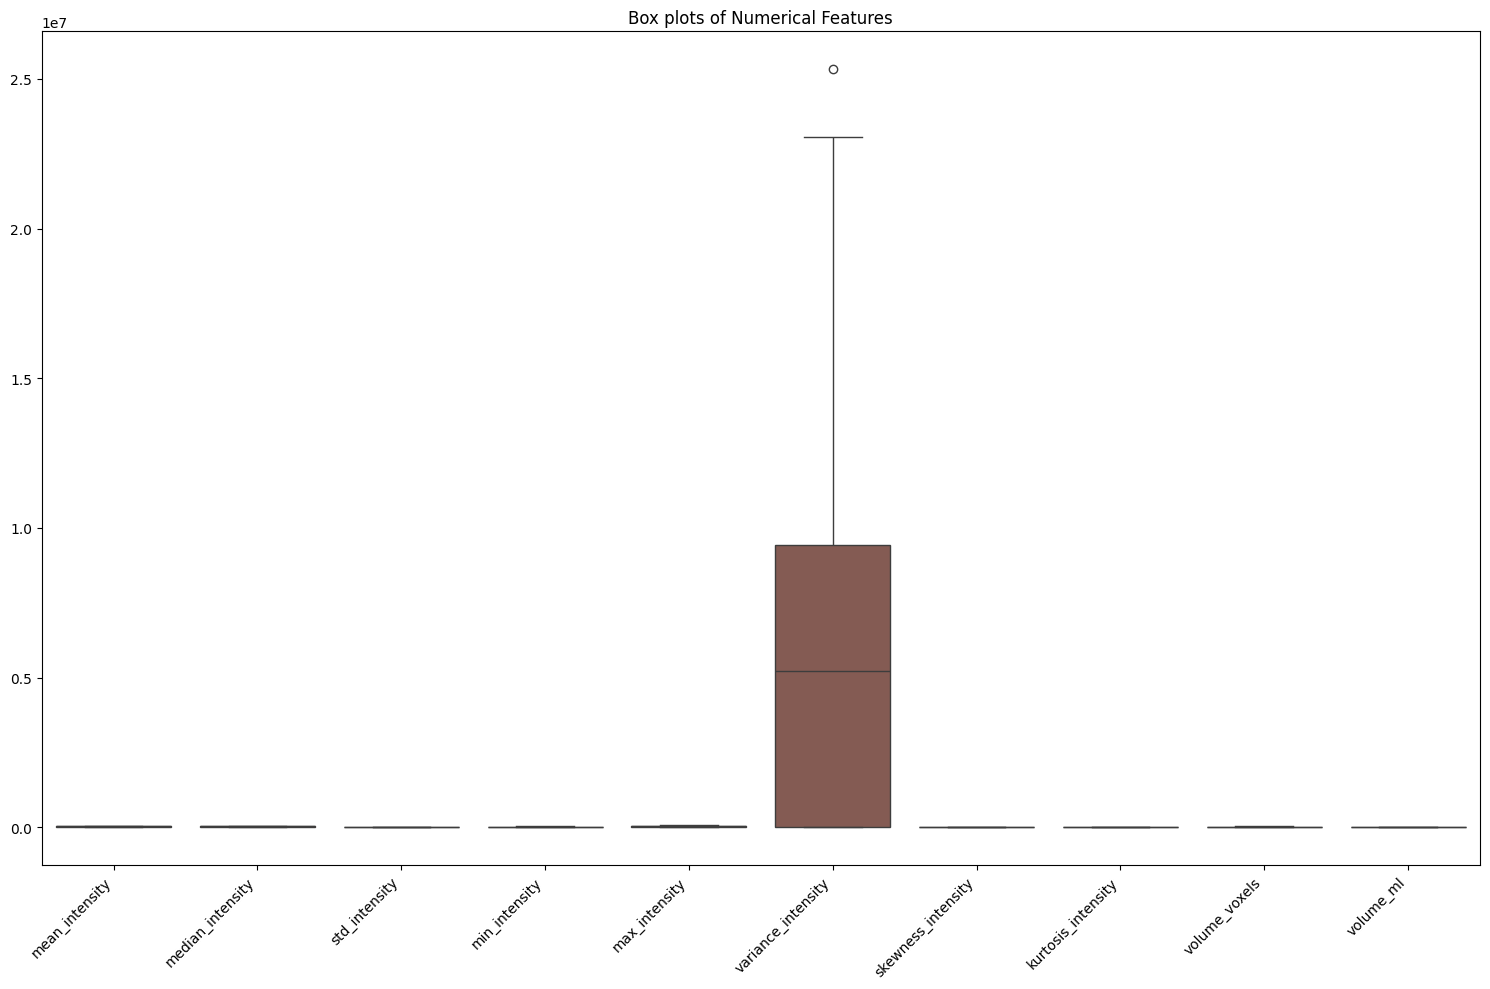

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns for visualization
numerical_features = df_features.select_dtypes(include=np.number)

# Plot histograms for numerical features
numerical_features.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# You can also create box plots to see the distribution and outliers
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=numerical_features)
# plt.title('Box plots of Numerical Features')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

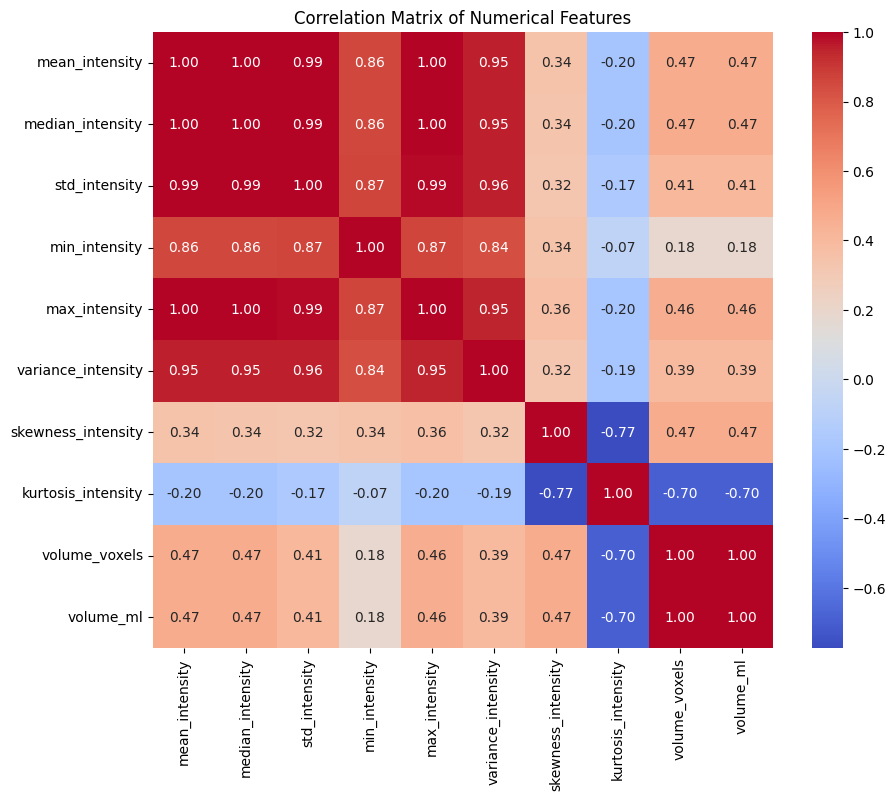

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation analysis
numerical_features = df_features.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [22]:
# Display the first few rows of the DataFrame
print("First 5 rows of the features DataFrame:")
display(df_features.head())

# Get information about the DataFrame (columns, data types, non-null counts)
print("\nDataFrame Info:")
df_features.info()

# Get descriptive statistics for the numerical features
print("\nDescriptive Statistics:")
display(df_features.describe())

First 5 rows of the features DataFrame:


,subject_scan,mean_intensity,median_intensity,std_intensity,min_intensity,max_intensity,variance_intensity,skewness_intensity,kurtosis_intensity,volume_voxels,volume_ml,surface_area_approx
0,training05_02,26121.413550,25970.917969,2286.140604,12966.480469,33917.613281,5.226439e+06,-0.449844,2.888297,6031,6.031,None
1,training05_03,688.151628,689.446838,69.232025,357.049652,920.454468,4.793073e+03,-0.533067,1.569744,5535,5.535,None
2,training05_04,759.117518,757.074402,66.487870,375.551880,961.033936,4.420637e+03,-0.389996,1.829467,5455,5.455,None
3,training05_01,47612.571214,47344.554688,4801.652008,29175.527344,66174.171875,2.305586e+07,-0.006845,1.559989,5895,5.895,None
4,training04_03,697.740505,695.647003,98.550505,98.588974,1056.841187,9.712202e+03,-0.946744,3.399445,3856,3.856,None



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_scan         21 non-null     object 
 1   mean_intensity       21 non-null     float64
 2   median_intensity     21 non-null     float64
 3   std_intensity        21 non-null     float64
 4   min_intensity        21 non-null     float64
 5   max_intensity        21 non-null     float64
 6   variance_intensity   21 non-null     float64
 7   skewness_intensity   21 non-null     float64
 8   kurtosis_intensity   21 non-null     float64
 9   volume_voxels        21 non-null     int64  
 10  volume_ml            21 non-null     float64
 11  surface_area_approx  0 non-null      object 
dtypes: float64(9), int64(1), object(2)
memory usage: 2.1+ KB

Descriptive Statistics:


,mean_intensity,median_intensity,std_intensity,min_intensity,max_intensity,variance_intensity,skewness_intensity,kurtosis_intensity,volume_voxels,volume_ml
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000
mean,20582.487274,20431.363722,1957.014463,9165.420488,27956.544143,7.098801e+06,-0.068734,1.089245,14752.285714,14.752286
std,19664.394056,19512.773484,1852.657515,10603.596575,26590.755506,8.560366e+06,0.444073,1.101777,12364.285714,12.364286
min,672.067901,664.625275,63.225575,56.187332,920.454468,3.997473e+03,-0.946744,-0.249055,3555.000000,3.555000
25%,759.117518,757.074402,80.967445,375.551880,1056.841187,6.555727e+03,-0.389996,0.132513,5535.000000,5.535000
50%,24449.127219,24140.201172,2286.140604,7198.165527,32311.494141,5.226439e+06,0.060910,0.767736,7756.000000,7.756000
75%,32522.188840,32176.144531,3069.512832,13594.948242,45149.457031,9.421909e+06,0.163374,1.829467,21353.000000,21.353000
max,55354.157243,54829.019531,5032.518756,31867.367188,73498.554688,2.532625e+07,0.847213,3.399445,38607.000000,38.607000


# Task
Generate a complete notebook for dataset analysis, including downloading the "marwa96/isbi-ms-dataset" dataset from KaggleHub, inspecting its structure, pairing FLAIR images with masks, extracting classical features, exploring and visualizing these features, and finally extracting features using a pre-trained ResNet18 model, merging them with the classical features, visualizing the combined features, and saving the results to a CSV file. The notebook should be fully functional and all explanations and responses should be in Spanish.

## Instalación de librerías

### Subtask:
Instalar PyTorch y las librerías adicionales necesarias para cargar el modelo y procesar las imágenes.


**Reasoning**:
Install the required libraries for loading the model and processing images, including torch, torchvision, and tqdm.



In [26]:
print("📦 Instalando librerías adicionales (PyTorch, torchvision, tqdm)...")
print("Esto puede tardar unos minutos...\n")

!pip install -q torch torchvision torchaudio
!pip install -q tqdm

print("✅ Instalación de librerías adicionales completada!")

📦 Instalando librerías adicionales (PyTorch, torchvision, tqdm)...
Esto puede tardar unos minutos...

✅ Instalación de librerías adicionales completada!


## Carga del modelo resnet18

### Subtask:
Cargar el modelo ResNet18 pre-entrenado con pesos de ImageNet.


**Reasoning**:
Import the necessary modules from torchvision and load the pre-trained ResNet18 model.



In [27]:
from torchvision.models import resnet18, ResNet18_Weights
import torch

# Load the pre-trained ResNet18 model with ImageNet weights
resnet18_model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Put the model in evaluation mode
resnet18_model.eval()

print("✅ Modelo ResNet18 pre-entrenado cargado y puesto en modo evaluación.")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 358MB/s]

✅ Modelo ResNet18 pre-entrenado cargado y puesto en modo evaluación.


## Definir funciones de preprocesamiento

### Subtask:
Crear funciones para preprocesar las imágenes RM, incluyendo la conversión de 3D a 2D (selección de cortes), conversión a RGB y redimensionamiento a 224x224.


**Reasoning**:
Define the `preprocess_image` function to handle image preprocessing steps as described in the instructions.



In [28]:
from torchvision.transforms import ToTensor, Normalize, Resize
from PIL import Image

def preprocess_image(image_data):
    """
    Preprocesses a 3D Nibabel image data array for ResNet18 input.

    Args:
        image_data (np.ndarray): 3D NumPy array of image data.

    Returns:
        torch.Tensor: Preprocessed and normalized 3-channel PyTorch tensor
                      resized to 224x224. Returns None if processing fails.
    """
    if image_data is None or image_data.size == 0:
        return None

    try:
        # 2. Select a representative 2D slice (middle slice along the axial plane)
        slice_idx = image_data.shape[2] // 2
        slice_2d = image_data[:, :, slice_idx]

        # Handle potential non-finite values by replacing with a reasonable value (e.g., mean or median)
        if not np.isfinite(slice_2d).all():
            print("Warning: Non-finite values found in image slice. Replacing with median.")
            median_val = np.nanmedian(slice_2d)
            slice_2d = np.nan_to_num(slice_2d, nan=median_val, posinf=median_val, neginf=median_val)


        # Normalize the slice to 0-255 range before converting to PIL Image
        # This is important as PIL expects image data in standard formats.
        slice_min = np.min(slice_2d)
        slice_max = np.max(slice_2d)
        if slice_max - slice_min > 0:
            slice_normalized = ((slice_2d - slice_min) / (slice_max - slice_min)) * 255
        else:
            # Handle cases where the slice is all the same value
            slice_normalized = np.zeros_like(slice_2d)


        # Convert to uint8 for PIL
        slice_uint8 = slice_normalized.astype(np.uint8)


        # 3. Convert the single-channel 2D slice to a 3-channel RGB image
        # Use PIL for image manipulation
        img_pil = Image.fromarray(slice_uint8, 'L') # 'L' for grayscale

        # Convert to RGB
        img_rgb = img_pil.convert('RGB')

        # 4. Resize the resulting 3-channel image to 224x224 pixels
        resize_transform = Resize((224, 224))
        img_resized = resize_transform(img_rgb)


        # 5. Convert the processed image to a PyTorch tensor and normalize
        to_tensor_transform = ToTensor()
        img_tensor = to_tensor_transform(img_resized)

        # ImageNet mean and standard deviation for normalization
        imagenet_mean = [0.485, 0.456, 0.406]
        imagenet_std = [0.229, 0.224, 0.225]
        normalize_transform = Normalize(mean=imagenet_mean, std=imagenet_std)

        img_normalized = normalize_transform(img_tensor)


        # 6. Return the preprocessed PyTorch tensor
        return img_normalized

    except Exception as e:
        print(f"Error during image preprocessing: {e}")
        return None

print("✅ Función preprocess_image definida.")

✅ Función preprocess_image definida.


## Extraer features de una imagen de prueba

### Subtask:
Implementar el proceso de preprocesamiento y extracción de features con el modelo ResNet18 para una sola imagen para verificar que funciona correctamente.


**Reasoning**:
Select a test image, load its data, preprocess it, extract features using the ResNet18 model, and print the shape of the extracted features.



In [29]:
import nibabel as nib
import torch
import numpy as np
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.transforms import ToTensor, Normalize, Resize
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


# Assuming 'paired_files' and 'preprocess_image' are available from previous steps
if 'paired_files' in locals() and len(paired_files) > 0:
    # 1. Select a test image (the first one in the dictionary)
    example_subject_scan = list(paired_files.keys())[0]
    example_files = paired_files[example_subject_scan]

    flair_img_path = example_files.get('flair_pp') or example_files.get('flair_orig')

    if flair_img_path:
        try:
            # 2. Load the FLAIR image data
            flair_img = nib.load(flair_img_path)
            flair_data = flair_img.get_fdata()
            print(f"Cargada imagen FLAIR para {example_subject_scan} con forma: {flair_data.shape}")

            # 3. Apply the preprocess_image function
            preprocessed_tensor = preprocess_image(flair_data)

            if preprocessed_tensor is not None:
                print(f"Preprocesamiento completado. Tensor preprocesado tiene forma: {preprocessed_tensor.shape}")

                # Ensure the model is loaded and in evaluation mode (from previous steps)
                if 'resnet18_model' in locals():
                    # 4. Pass the tensor through the ResNet18 model to get features
                    resnet18_model.eval()
                    with torch.no_grad():
                        # We want features before the final classification layer
                        # The last layer is typically named 'fc' in ResNet
                        # Let's get the output from the layer just before 'fc'
                        features = resnet18_model(preprocessed_tensor.unsqueeze(0)) # Add batch dimension

                        # Get features from the layer before the final FC layer (AdaptiveAvgPool2d)
                        # Need to access the sequential modules
                        # Let's rebuild the model up to the layer before the final FC layer
                        feature_extractor = torch.nn.Sequential(*(list(resnet18_model.children())[:-1]))
                        features = feature_extractor(preprocessed_tensor.unsqueeze(0))

                        # The output of AdaptiveAvgPool2d is [batch_size, 512, 1, 1]
                        # We need to flatten it to [batch_size, 512]
                        features = torch.flatten(features, 1)


                    # 5. Print the shape of the extracted features
                    print(f"Features extraídas con forma: {features.shape}")

                else:
                    print("Error: Modelo ResNet18 no encontrado. Por favor, asegúrese de ejecutar el paso de carga del modelo.")
            else:
                print("Error: El preprocesamiento de la imagen falló.")

        except Exception as e:
            print(f"Error al procesar la imagen {example_subject_scan}: {e}")
    else:
        print(f"No se encontró imagen FLAIR (preprocesada o original) para {example_subject_scan}.")
else:
    print("Diccionario paired_files no encontrado o vacío. Por favor, ejecute los pasos anteriores para crearlo.")

Cargada imagen FLAIR para training05_02 con forma: (181, 217, 181)
Preprocesamiento completado. Tensor preprocesado tiene forma: torch.Size([3, 224, 224])
Features extraídas con forma: torch.Size([1, 512])


## Procesamiento masivo y extracción de features

### Subtask:
Iterar sobre todas las imágenes del conjunto de datos, aplicar el preprocesamiento y extraer las 512 features por imagen utilizando el modelo ResNet18. Implementar una barra de progreso para monitorear el proceso.


**Reasoning**:
Iterar sobre todas las imágenes del conjunto de datos, aplicar el preprocesamiento y extraer las 512 features por imagen utilizando el modelo ResNet18, mostrando una barra de progreso.



In [30]:
from tqdm import tqdm
import torch
import numpy as np
import nibabel as nib
from torchvision.models import resnet18, ResNet18_Weights # Import necessary modules

# Make sure paired_files, preprocess_image, and resnet18_model are available
if 'paired_files' in locals() and 'preprocess_image' in globals() and 'resnet18_model' in locals():

    cnn_features_list = []

    print(f"Extrayendo features CNN para {len(paired_files)} sujetos/escaneos...")

    # Ensure the model is in evaluation mode
    resnet18_model.eval()

    # Get the feature extractor part of the model
    feature_extractor = torch.nn.Sequential(*(list(resnet18_model.children())[:-1]))


    for subject_scan, files in tqdm(paired_files.items(), desc="Procesando imágenes"):
        flair_img_path = files.get('flair_pp') or files.get('flair_orig')

        if flair_img_path:
            try:
                # Load FLAIR image
                flair_img = nib.load(flair_img_path)
                flair_data = flair_img.get_fdata()

                # Apply preprocessing
                preprocessed_tensor = preprocess_image(flair_data)

                if preprocessed_tensor is not None:
                    # Extract features
                    with torch.no_grad():
                        # Add batch dimension and pass through feature extractor
                        features = feature_extractor(preprocessed_tensor.unsqueeze(0))
                        # Flatten the features
                        features = torch.flatten(features, 1)

                    # Convert to numpy and store
                    cnn_features = features.squeeze(0).numpy()
                    # Create a dictionary with subject_scan and features
                    feature_dict = {'subject_scan': subject_scan}
                    for i in range(cnn_features.shape[0]):
                        feature_dict[f'cnn_feature_{i+1}'] = cnn_features[i]

                    cnn_features_list.append(feature_dict)

                else:
                    print(f"Error de preprocesamiento para {subject_scan}. Saltando.")

            except Exception as e:
                print(f"Error al procesar {subject_scan}: {e}")
                # Optionally, append an entry with an error flag or skip
                continue # Skip to the next subject_scan on error

        else:
            print(f"No se encontró imagen FLAIR (preprocesada o original) para {subject_scan}. Saltando.")
            continue # Skip to the next subject_scan if no image path

    # Convert the list of dictionaries to a pandas DataFrame
    df_cnn_features = pd.DataFrame(cnn_features_list)

    print("\nExtracción de features CNN completa.")
    print("DataFrame con features CNN extraídas:")
    display(df_cnn_features.head())
    print("\nInformación del DataFrame de features CNN:")
    df_cnn_features.info()

else:
    print("Funciones de preprocesamiento, modelo o diccionario paired_files no encontrados. Por favor, ejecute los pasos anteriores.")

Extrayendo features CNN para 21 sujetos/escaneos...


Procesando imágenes: 100%|██████████| 21/21 [00:00<00:00, 37.81it/s]


Extracción de features CNN completa.
DataFrame con features CNN extraídas:


,subject_scan,cnn_feature_1,cnn_feature_2,cnn_feature_3,cnn_feature_4,cnn_feature_5,cnn_feature_6,cnn_feature_7,cnn_feature_8,cnn_feature_9,...,cnn_feature_503,cnn_feature_504,cnn_feature_505,cnn_feature_506,cnn_feature_507,cnn_feature_508,cnn_feature_509,cnn_feature_510,cnn_feature_511,cnn_feature_512
0,training05_02,0.959118,0.723104,0.208553,0.529967,0.112228,1.400036,3.144948,0.051687,0.692313,...,0.000000,0.566658,1.781574,1.164947,2.953342,0.070759,0.000000,0.079686,0.003122,1.839907
1,training05_03,1.027360,0.623823,0.171936,0.570092,0.067838,1.788704,3.592281,0.021426,0.763909,...,0.000000,0.568692,2.172250,0.885659,2.731500,0.039628,0.000000,0.064917,0.011893,2.051044
2,training05_04,1.061935,0.588544,0.114264,0.455853,0.000000,1.636340,3.616492,0.012239,0.739027,...,0.000000,0.854703,1.863759,1.236882,2.498155,0.024748,0.000000,0.044310,0.011158,2.032408
3,training05_01,0.941286,0.668747,0.091020,1.009524,0.099134,2.025147,3.903015,0.060354,0.542297,...,0.144039,0.465982,2.082380,0.257210,2.633586,0.042232,0.048045,0.116903,0.000000,1.425197
4,training04_03,0.506328,0.797457,0.313875,0.408088,0.101944,1.834654,2.795315,0.000000,0.676149,...,0.004929,1.687074,1.322413,1.854342,1.629548,0.007338,0.000000,0.056564,0.145762,0.652941



Información del DataFrame de features CNN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 513 entries, subject_scan to cnn_feature_512
dtypes: float32(512), object(1)
memory usage: 42.3+ KB


## Fusión de features

### Subtask:
Combinar las features extraídas con ResNet18 (almacenadas en `df_cnn_features`) con las features clásicas previamente calculadas (del DataFrame `df_features`).


**Reasoning**:
Merge the classical features and CNN features DataFrames using the 'subject_scan' column as the key and display the head and info of the resulting DataFrame to verify the merge.



In [31]:
import pandas as pd

# Ensure df_features and df_cnn_features DataFrames are available
if 'df_features' in locals() and 'df_cnn_features' in locals():

    # Merge the two DataFrames on the 'subject_scan' column
    df_combined_features = pd.merge(df_features, df_cnn_features, on='subject_scan', how='inner')

    print("✅ DataFrames df_features y df_cnn_features fusionados correctamente.")
    print("\nPrimeras 5 filas del DataFrame combinado:")
    display(df_combined_features.head())

    print("\nInformación del DataFrame combinado:")
    df_combined_features.info()

else:
    print("Error: df_features o df_cnn_features no encontrados. Asegúrese de ejecutar los pasos anteriores para crearlos.")

✅ DataFrames df_features y df_cnn_features fusionados correctamente.

Primeras 5 filas del DataFrame combinado:


,subject_scan,mean_intensity,median_intensity,std_intensity,min_intensity,max_intensity,variance_intensity,skewness_intensity,kurtosis_intensity,volume_voxels,...,cnn_feature_503,cnn_feature_504,cnn_feature_505,cnn_feature_506,cnn_feature_507,cnn_feature_508,cnn_feature_509,cnn_feature_510,cnn_feature_511,cnn_feature_512
0,training05_02,26121.413550,25970.917969,2286.140604,12966.480469,33917.613281,5.226439e+06,-0.449844,2.888297,6031,...,0.000000,0.566658,1.781574,1.164947,2.953342,0.070759,0.000000,0.079686,0.003122,1.839907
1,training05_03,688.151628,689.446838,69.232025,357.049652,920.454468,4.793073e+03,-0.533067,1.569744,5535,...,0.000000,0.568692,2.172250,0.885659,2.731500,0.039628,0.000000,0.064917,0.011893,2.051044
2,training05_04,759.117518,757.074402,66.487870,375.551880,961.033936,4.420637e+03,-0.389996,1.829467,5455,...,0.000000,0.854703,1.863759,1.236882,2.498155,0.024748,0.000000,0.044310,0.011158,2.032408
3,training05_01,47612.571214,47344.554688,4801.652008,29175.527344,66174.171875,2.305586e+07,-0.006845,1.559989,5895,...,0.144039,0.465982,2.082380,0.257210,2.633586,0.042232,0.048045,0.116903,0.000000,1.425197
4,training04_03,697.740505,695.647003,98.550505,98.588974,1056.841187,9.712202e+03,-0.946744,3.399445,3856,...,0.004929,1.687074,1.322413,1.854342,1.629548,0.007338,0.000000,0.056564,0.145762,0.652941



Información del DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 524 entries, subject_scan to cnn_feature_512
dtypes: float32(512), float64(9), int64(1), object(2)
memory usage: 44.1+ KB


## Visualizaciones de las features combinadas

### Subtask:
Realizar visualizaciones (por ejemplo, histogramas, mapas de calor de correlación) para explorar las características combinadas.


**Reasoning**:
Select numerical columns from the combined DataFrame and generate histograms and a correlation heatmap to visualize the feature distributions and relationships.



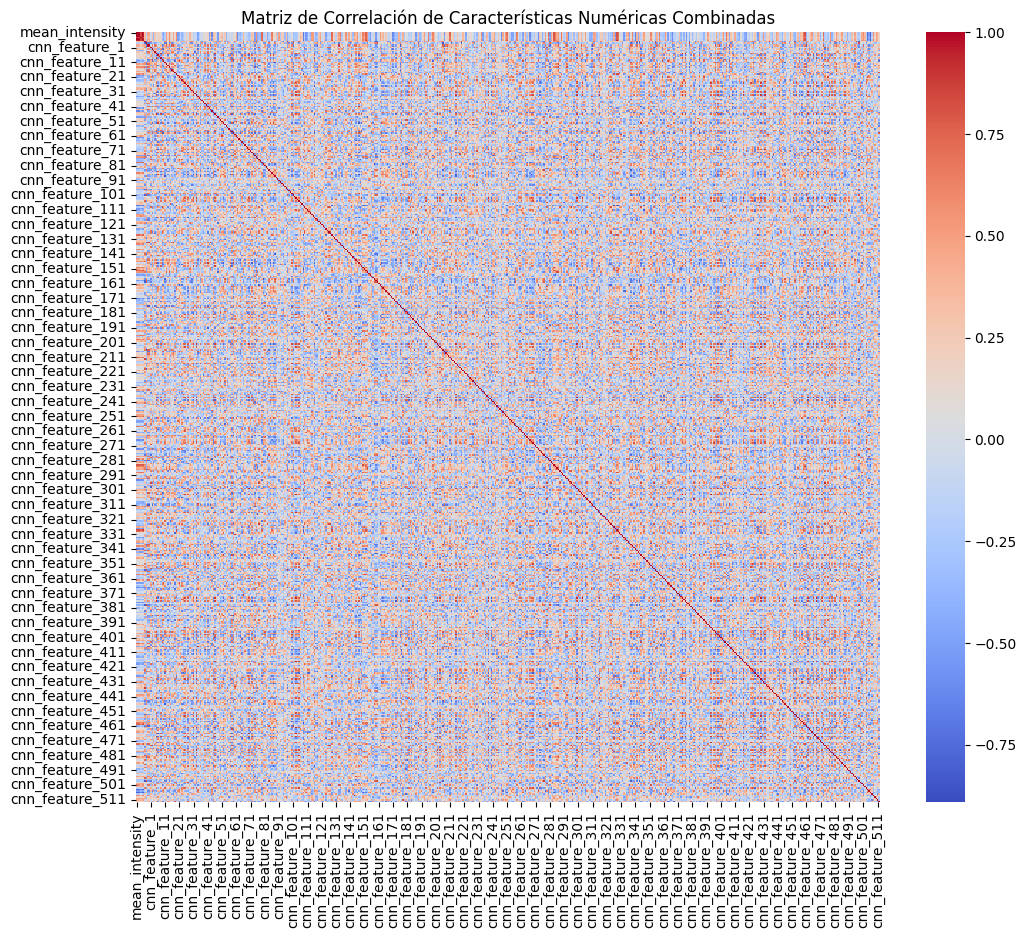

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only the numerical columns for visualization
# Exclude 'subject_scan' which is an object type
numerical_features_combined = df_combined_features.select_dtypes(include=np.number)

# Plot histograms for numerical features
# Adjust figure size based on the number of features for better readability
n_features = numerical_features_combined.shape[1]
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
numerical_features_combined.hist(ax=plt.gca(), bins=20) # Plot on the current axes
plt.suptitle('Distribución de Características Numéricas Combinadas', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

# Calculate the correlation matrix
correlation_matrix_combined = numerical_features_combined.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10)) # Adjust figure size for heatmap
sns.heatmap(correlation_matrix_combined, cmap='coolwarm', fmt=".2f") # Removed annot=True due to large number of features
plt.title('Matriz de Correlación de Características Numéricas Combinadas')
plt.show()